## Song Popularity Prediction 


<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Song_Popularity_Prediction_/main/songs.jpg"  Width="800">


## Einleitung und Hintergrund

Musikunternehmen investieren erheblich in die Suche nach Liedern, die einen starken Einfluss haben können. Eine Idee davon, was ein bestimmtes Lied einflussreich macht, kann enorme Gewinne für die Musikindustrie bringen. Diese Idee kann helfen, den Erfolg eines Liedes vor der Veröffentlichung des Albums vorherzusagen. Ein guter Teil der Arbeit wird auf die Texte des Liedes verwendet. Die automatische Vorhersage, ob ein Lied ein Hit wird, bleibt eine Herausforderung. Mit der Digitalisierung kann eine große Menge an Informationen über das Lied erfasst, reproduziert, überarbeitet und umgestaltet werden. Musikalische Geschmäcker variieren von Person zu Person und sind in der heutigen Welt höchst individuell. Streaming-Dienste wie Spotify haben dies erkannt und Algorithmen eingesetzt, um den Musikgeschmack Einzelner zu verstehen und Musik basierend auf ihrer Hörgeschichte zu empfehlen. Dies hilft dem Nutzer, eine personalisierte Playlist zu erhalten. Obwohl es für die Verbraucher einfacher wird, haben Künstler eine schwere Zeit, kontinuierlich gute Musik zu produzieren. Ein Hit-Song kann Wunder für ihre Karrieren bewirken und sie direkt ins Rampenlicht rücken. Es gibt viel Unsicherheit, wenn sie ein neues Lied herausbringen, ob es weltweit von den Verbrauchern akzeptiert wird. Es ist auch eine große Investition für die Produzenten. Mit dem Aufkommen von Data Science und maschinellem Lernen haben Industrien ihren Geschäftsansatz verändert. Die Verfügbarkeit von Daten hat ihnen die Möglichkeit gegeben, Ergebnisse genauer und mit größerer Sicherheit vorherzusagen. Die Musikindustrie kann auch maschinelle Lernalgorithmen anwenden, um zu sehen, ob ein Lied ein Hit wird oder nicht. So können sie kleinere Anpassungen vornehmen, unter Berücksichtigung der musikalischen Vision des Künstlers, und ein größeres Publikum ansprechen. Die Musikindustrie weltweit besteht aus Unternehmen und Einzelpersonen, die viel Geld verdienen, indem sie Lieder erstellen und diese durch Live-Konzerte, Shows usw. an die Leute verkaufen. Es gibt keine Garantie dafür, dass ein Signal im Lied populär wird und zu hohen Gewinnen führt, während einige Signale möglicherweise nicht so beliebt sind und zu Verlusten führen können.

Menschen haben eine tiefe Verbindung zu Liedern und Musik entwickelt. Musik kann die Stimmung verbessern, Schmerzen und Angst verringern und Gelegenheiten für emotionalen Ausdruck bieten. Forschungen deuten darauf hin, dass Musik unsere physische und psychische Gesundheit auf vielfältige Weise fördern kann. In jüngster Zeit wurden zahlreiche Studien durchgeführt, um die Beliebtheit von Liedern auf der Grundlage bestimmter Faktoren zu verstehen. Solche Liedproben werden aufgeschlüsselt und ihre Parameter aufgezeichnet, um sie zu tabellieren. Das Hauptziel dieser Untersuchungen ist es, die Popularität von Liedern vorherzusagen.

Resource: <a href="https://link.springer.com/chapter/10.1007/978-981-16-0336-5_4">Prediction of song popularity using machine learning concepts</a>

### Bibliotheken und ihre Verwendung
- `Pandas` und `NumPy` werden für die Datenmanipulation verwendet.
- `Matplotlib` und `Seaborn` ermöglichen die Erstellung informativer Visualisierungen zur Analyse der Daten.
- `Scikit-learn` wird für das Maschinelle Lernen verwendet, einschließlich Modellbildung, Training und Evaluation.


In [686]:
# Import necessary libraries

import math
import numpy as np
import pandas as pd
import collections
import joblib
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Import machine learning libraries
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

# 1.Datenüberblick

Der Song Popularity Datensatz, heruntergeladen von der Seite www.kaggle.com am 13. Mai 2024, umfasst eine Zusammenstellung von 18.835 Liedern, die jeweils durch 14 unterschiedliche Merkmale repräsentiert werden. Diese Merkmale reflektieren verschiedene akustische Eigenschaften und bieten Einblicke in die technischen Eigenschaften sowie die Popularitätsbewertungen zahlreicher Titel. Diese Informationen geben Aufschluss über die Attribute, die möglicherweise zu einem kommerziellen Erfolg eines Liedes beitragen.

Ein Auszug aus dem Datensatz, der einige dieser Merkmale illustriert, ist in der untenstehenden Tabelle dargestellt. Diese Daten bieten ein grundlegendes Verständnis dafür, wie verschiedene musikalische Komponenten interagieren und die Präferenzen der Hörer sowie die Popularität von Liedern beeinflussen. Dies ermöglicht gezielte Analysen und prädiktive Modellierung innerhalb unseres Projekts.

In [687]:
#Importing the dataset

df = pd.read_csv('./song_data.csv')

df.drop(['song_name'], axis=1, inplace=True)
display(df.head())

target = 'song_popularity'
features = [i for i in df.columns if i != target]

original_df = df.copy(deep=True)

print('\nInference: The Dataset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



Inference: The Dataset consists of 14 features & 18835 samples.




Die obige Tabelle zeigt die ersten fünf Zeilen unseres Datensatzes, der verschiedene Attribute von Liedern zusammen mit deren Popularität enthält. Jede Zeile repräsentiert ein Lied mit spezifischen Merkmalen wie `song_name`, `song_popularity`, `song_duration_ms` (Dauer in Millisekunden), `acousticness`, `danceability`, `energy`, und weitere. Diese Merkmale könnten uns wertvolle Einblicke geben, wie etwa:

- **Popularität**: Die Spalte `song_popularity` zeigt, wie beliebt ein Lied ist, was für Analysen zur Trendbestimmung nützlich sein kann.
- **Dauer**: Die Dauer eines Liedes, gezeigt in der Spalte `song_duration_ms`, könnte Einfluss auf seine Beliebtheit oder Einsatzmöglichkeiten haben.
- **Akustik**: `acousticness` misst, wie akustisch ein Lied ist, was auf den Stil oder das Genre hinweisen könnte.
- **Tanzbarkeit** und **Energie**: Diese Attribute geben an, wie tanzbar und energiegeladen die Lieder sind, wichtige Faktoren für die Verwendung in verschiedenen sozialen und kommerziellen Kontexten.




#### Datenbeschreibung


Die folgenden Tabellen zeigen die Beschreibung der numerischen Features des Datensatzes und die Anzahl der eindeutigen Werte in jeder Spalte.

In [688]:
# Statistische Zusammenfassung der numerischen Features
df.describe()


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000



Mit der Funktion `describe()` erhalten wir eine statistische Zusammenfassung der numerischen Features unseres Datensatzes. Diese umfasst Durchschnitt, Standardabweichung, Minimum, Maximum und die Quartile, was uns wertvolle Einblicke in die Verteilung jeder Variablen bietet:

- **song_popularity**: Die Popularität der Songs hat einen Durchschnitt von etwa 53, wobei die Werte von 0 (nicht beliebt) bis 100 (sehr beliebt) reichen. Die Standardabweichung von ca. 22 zeigt eine breite Streuung der Popularitätswerte, was auf eine diverse Mischung von Songs im Datensatz hindeutet.
- **song_duration_ms**: Die Dauer der Songs variiert erheblich, von sehr kurzen Tracks (mindestens 12,000 Millisekunden) bis zu sehr langen (maximal 1,799,346 Millisekunden), was auf eine Vielfalt von Musikgenres und -stilen schließen lässt.
- **acousticness, danceability, energy**: Diese Attribute zeigen eine breite Palette von Werten, die darauf hindeuten, dass der Datensatz eine Vielzahl musikalischer Ausdrücke enthält, von sehr akustischen bis sehr elektronischen, von wenig tanzbar bis sehr tanzbar, und von energiearm bis energiereich.
- **instrumentalness**: Der Großteil der Lieder hat sehr niedrige Werte (nahe 0), was darauf hindeutet, dass sie gesanglich dominiert sind. Einige Songs weisen jedoch hohe Werte auf, was auf reine Instrumentalstücke hinweist.
- **liveness, loudness, speechiness**: Diese Variablen bieten Einblicke in die Aufnahmequalität und den Inhalt der Lieder. Eine hohe "liveness" kann auf Live-Aufnahmen hindeuten, während "loudness" die Abmischung und Mastering-Praktiken widerspiegelt.

Diese detaillierte statistische Betrachtung der Features hilft uns, die Natur unseres Datensatzes zu verstehen und bildet die Basis für weiterführende Analysen wie etwa Korrelationen zwischen den Merkmalen und deren Einfluss auf die Songpopularität.


In [689]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [690]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 10 numerical & 3 categorical features.


### Überprüfung der Datentypen
Es ist wichtig zu verstehen, welche Datentypen in unserem Datensatz vorhanden sind und ob es fehlende Werte gibt, die vor der weiteren Analyse behandelt werden müssen.


In [691]:
# Display data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


Hier ist ein Überblick über die Datentypen in unserem Datensatz und die Anzahl der nicht-fehlenden Werte in jeder Spalte:

- **Datentypen**: Unser Datensatz beinhaltet eine Mischung aus numerischen (int64 und float64) und kategorischen (object für Text) Datentypen.
- **Nicht-fehlende Werte**: Alle 18,835 Dateneinträge in jeder der 15 Spalten haben gültige Werte, was darauf hindeutet, dass es keine fehlenden Daten gibt. Dies ist eine gute Nachricht, da keine unmittelbaren Schritte zur Behandlung von fehlenden Daten erforderlich sind.
- **Speichernutzung**: Die Gesamtspeichernutzung unseres DataFrames beträgt etwa 2.2 MB, was für die Datenverarbeitung und -analyse effizient ist.

### Datenvisualisierung und Explorative Datenanalyse
Die Boxplots und Histogramme visualisieren die Verteilungen jedes Audiofeatures in unserem Datensatz. Aus den Boxplots können wir die Medianwerte, die Quartilsspannen sowie Ausreißer erkennen. Die Histogramme helfen uns, die Form der Verteilungen zu verstehen, z.B. ob sie links- oder rechtsschief sind.


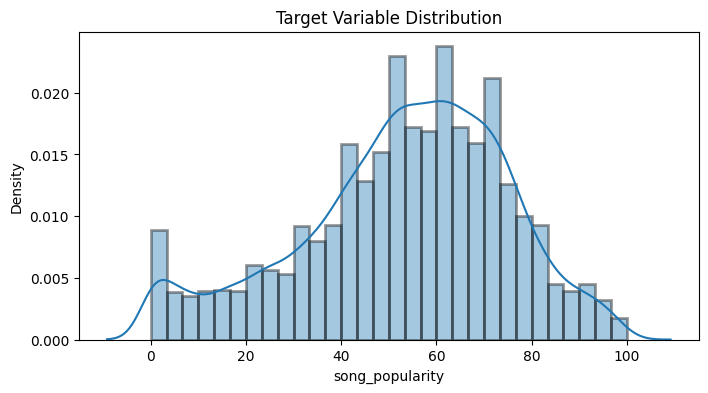

In [692]:
#analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target],hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

Normalverteilt mit durchshcnitt bei ungefähr 60

<Axes: >

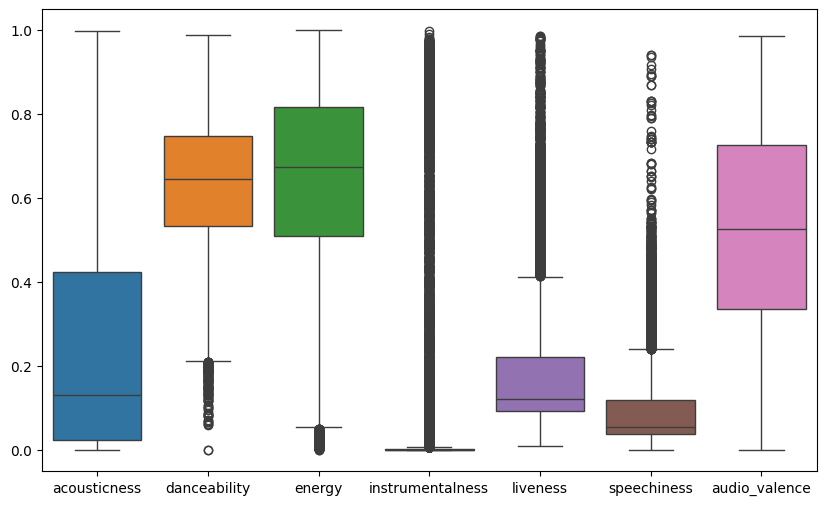

In [693]:
# Boxplot of audio features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'audio_valence']])


### Boxplots der Audiofeatures:
- **Akustik (Acousticness):** Zeigt eine breite Streuung, viele Songs haben eine niedrige akustische Komponente, was auf eine moderne, elektronische oder verstärkte Musikproduktion hindeuten könnte.
- **Tanzbarkeit (Danceability):** Die meisten Werte sind zentral verteilt, was eine generelle Tanzbarkeit der Songs anzeigt.
- **Energie (Energy):** Die Energie ist meistens hoch, was für aufregende oder laute Musik spricht.
- **Instrumentalität (Instrumentalness):** Sehr polarisiert, viele Songs haben entweder keine oder eine sehr hohe instrumentale Komponente, was auf eine klare Trennung zwischen rein instrumentaler Musik und gesangsbasierter Musik hindeutet.
- **Lebendigkeit (Liveness):** Die meisten Songs zeigen geringe Live-Komponenten, was typisch für Studioaufnahmen ist.
- **Sprechgesang (Speechiness):** Niedrige Werte dominieren, was üblich ist, außer Musik ist spezifisch sprechgesang-basiert.
- **Stimmung (Audio Valence):** Breite Verteilung, was auf eine vielfältige emotionale Palette in den Songs hinweist.

### Histogramme der Audiofeatures



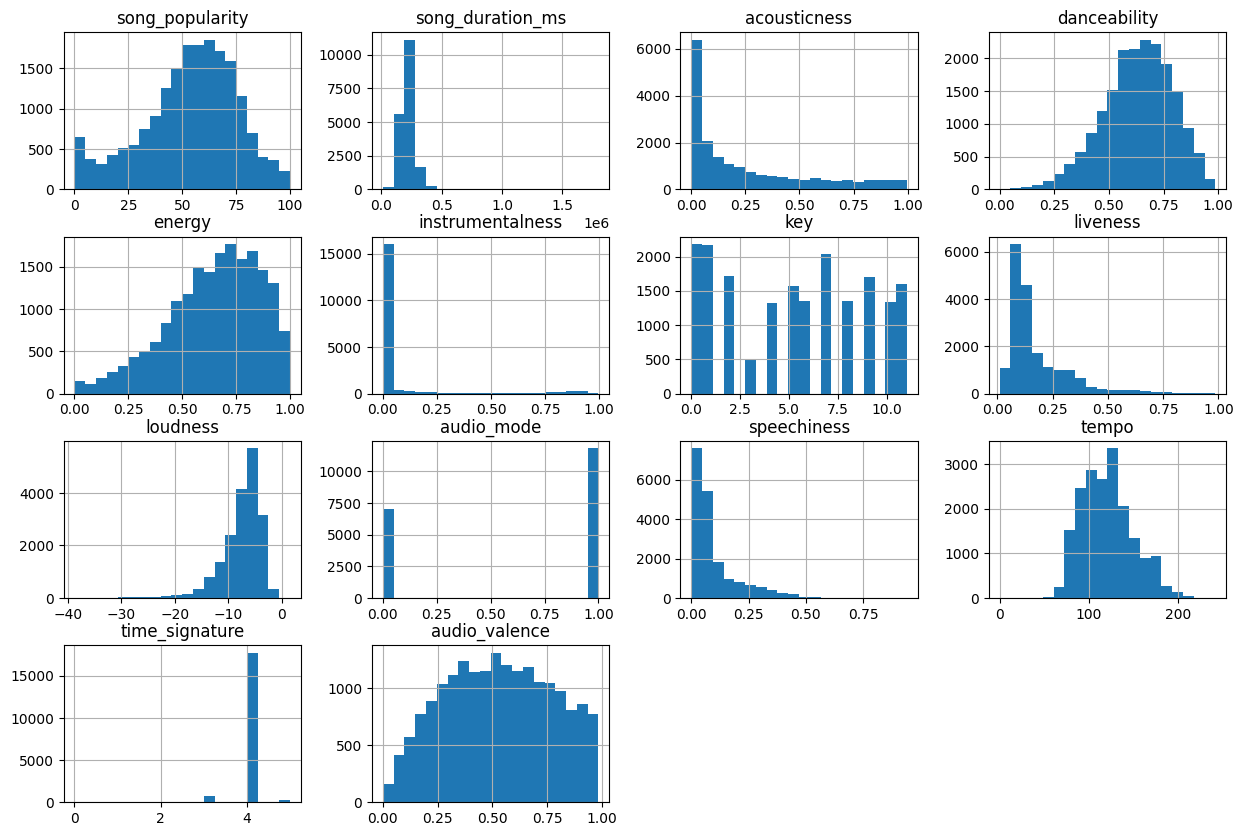

In [694]:
# Histograms of features
df.hist(bins=20, figsize=(15, 10))
plt.show()


Die Histogramme unten zeigen die Verteilungen der einzelnen Audiofeatures unseres Datensatzes. Diese Visualisierungen sind entscheidend, um das Verhalten der Daten zu verstehen und mögliche Muster zu erkennen, die nützlich für die Vorhersage der Songpopularität sein könnten:

- **Song Popularity**: Die Verteilung zeigt einen bimodalen Trend, was darauf hindeutet, dass Songs tendenziell entweder niedrig oder hoch bewertet werden, mit weniger Songs in der mittleren Popularitätsrange.
- **Song Duration**: Die meisten Songs haben eine Dauer von weniger als 300.000 Millisekunden (300 Sekunden). Sehr lange Songs sind selten, was in der steilen Abnahme der Histogrammkurve zu sehen ist.
- **Acousticness**: Viele Songs haben eine niedrige akustische Präsenz, was auf eine Dominanz von elektronisch verstärkter oder produzierter Musik hindeutet.
- **Danceability**: Die Verteilung ist annähernd normal, was darauf hinweist, dass die meisten Songs eine moderate Tanzbarkeit aufweisen.
- **Energy**: Die Energie der Songs zeigt eine leichte Rechtsschiefe, was bedeutet, dass viele Songs eine hohe Energiestufe besitzen.
- **Instrumentalness**: Sehr viele Songs haben eine nahezu null Instrumentalität, was auf eine geringe Präsenz von rein instrumentalen Tracks hindeutet.
- **Liveness**: Diese Verteilung zeigt, dass die meisten Songs geringe Live-Komponenten aufweisen, was typisch für Studioaufnahmen ist.
- **Loudness**: Die Lautstärke der Songs zeigt, dass die meisten Tracks relativ laut sind, mit Spitzenwerten um -5 Dezibel.
- **Speechiness**: Die Mehrheit der Songs hat sehr niedrige Sprechgesangswerte, was darauf hindeutet, dass reine Gesangseinlagen seltener sind.
- **Audio Valence**: Dieses Merkmal zeigt eine breite Verteilung, was auf eine vielfältige emotionale Palette in der Musik hinweist.
- **Tempo**: Das Tempo der Songs zeigt eine breite Verteilung mit einem Gipfel um 120 BPM, was einem üblichen Tempo für viele populäre Musikgenres entspricht.

Diese Visualisierungen sind entscheidend für das Verständnis der Datencharakteristik und werden in den nächsten Schritten der Analyse verwendet, um Modelle zur Vorhersage der Songpopularität zu entwickeln.


# 2.Datenaufbereitung für das Modelltraining


### Entfernen aller Duplikate

In [695]:
#Removal of any Duplicate rows (if any)

counter = 0
rs, cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape == (rs, cs):
    print('\nInference: The dataset doesn\'t have any duplicates')
else:
    print(f'\nInference: Number of duplicates dropped/fixed ---> {rs - df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


### Überprüfe für fehlende Werte

In [696]:
# Check for empty elements
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values'] / df.shape[0], 3) * 100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


In [697]:
# Splitting the dataset into training, validation, and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
# Display the sizes of each dataset
print("Trainingsdaten:", train_data.shape)
print("Validierungsdaten:", val_data.shape)
print("Testdaten:", test_data.shape)

Trainingsdaten: (8954, 14)
Validierungsdaten: (2985, 14)
Testdaten: (2985, 14)


In [698]:
# Converting categorical columns to numeric
df3 = df.copy()
ecc = nvc[nvc['Percentage'] != 0].index.values
fcc = [i for i in features if i not in ecc]
# One-Hot Encoding and Dummy Encoding
oh = True
dm = True
for i in fcc:
    if df3[i].nunique() == 2:
        if oh:
            print("\nOne-Hot Encoding on features:")
        print(i)
        oh = False
        df3[i] = pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if 2 < df3[i].nunique() < 17:
        if dm:
            print("\nDummy Encoding on features:")
        print(i)
        dm = False
        df3 = pd.concat([df3.drop([i], axis=1), pd.get_dummies(df3[i], drop_first=True, prefix=str(i))], axis=1)



Dummy Encoding on features:
key

One-Hot Encoding on features:
audio_mode
time_signature


### Entfernung von Ausreißern

Ein Ausreißer ist ein Datenpunkt, der sich erheblich von den anderen Beobachtungen in einem Datensatz unterscheidet. Mit anderen Worten, es ist eine Beobachtung, die über den allgemeinen Trend hinausgeht. Der unten gezeigte Algorithmus wurde verwendet, um diese Werte zu identifizieren. In den ersten beiden Zeilen des Algorithmus werden die Berechnungen für das erste und dritte Quartil durchgeführt. Nach dieser Berechnung wird der Interquartilsabstand (IQR) berechnet. Der Quartilsabstand ist der Name, der der Differenz zwischen den 75%- und 25%-Werten der Datensätze gegeben wird. Mit anderen Worten, die Quartile repräsentieren die mittleren 50% der Daten. Dies zeigt uns, wie die Mittelwerte verteilt sind. Allgemein werden Werte, die 1,5-mal kleiner als das 25%-Quartil und 1,5-mal größer als das 75%-Quartil sind, als Ausreißer klassifiziert.
Insgesamt wurden 5.974 Ausreißer identifiziert, als diese Methode auf den Datensatz angewendet wurde. Diese Werte wurden aus dem Datensatz entfernt.

Resource: <a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a>

In [699]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf
for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\nInference:\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))


,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,True,0.0294,...,False,False,True,False,False,False,False,False,True,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,False,0.0498,...,False,False,False,False,False,False,False,False,True,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,True,0.1070,...,False,False,False,False,False,False,False,False,True,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,True,0.0313,...,False,False,False,False,True,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,False,0.1240,...,False,False,False,False,False,False,False,False,True,False



Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


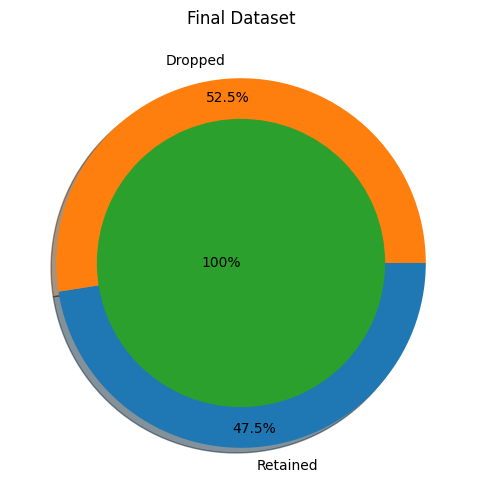


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [700]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

# 4.Datenmanipulation

##### Aufteilung in Trainings- und Testdatensätze
Die Daten wurden in Trainings- und Testsets aufgeteilt. Dies ist entscheidend, um eine Überanpassung des Modells zu vermeiden und eine unabhängige Bewertung der Modellleistung zu gewährleisten.


In [701]:
# Splitting the data into training & testing sets
df.columns = [i.replace(' ', '_') for i in df.columns.values]
X = df.drop([target], axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True, inplace=True)
print('Original set  ---> ', X.shape, Y.shape)
print('Training set  ---> ', Train_X.shape, Train_Y.shape)
print('Testing set   ---> ', Test_X.shape, Test_Y.shape)

Original set  --->  (8950, 26) (8950,)
Training set  --->  (7160, 26) (7160,)
Testing set   --->  (1790, 26) (1790,)


### Feature-Skalierung 


Die Skalierung von Merkmalen (Feature Scaling) ist ein wichtiger Aspekt bei der Entwicklung von maschinellen Lernmodellen. Häufig enthalten Datensätze Merkmale, die sich stark in ihrer Größenordnung und ihren Einheiten unterscheiden. Während dies für einige Algorithmen des maschinellen Lernens kein Problem darstellt, kann es bei vielen anderen zu Schwierigkeiten führen. Viele Algorithmen im maschinellen Lernen, wie solche, die euklidische Distanzen zur Berechnung der Abstände zwischen zwei Punkten verwenden, sind empfindlich gegenüber Unterschieden in der Skalierung der Eingabedaten. Unangemessene Skalierung kann daher die Leistungsfähigkeit und die Genauigkeit der Modelle erheblich beeinträchtigen.


In [702]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('Standardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','Standardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                           Standardardization on Training set                                           


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,-2.143537e-16,-9.551639e-17,-4.381349e-16,-1.359558e-16,-2.480945e-18,-8.782546e-17,-9.824543e-17,1.984756e-17,1.081692e-16,-1.429024e-16,...,-1.389329e-17,7.591693e-17,4.465702e-17,5.185176e-17,-7.939025e-17,-2.431326e-17,-4.961891e-18,-1.265282e-17,2.838201e-16,-2.406517e-17
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.625387e+00,-9.181177e-01,-2.918774e+00,-3.131156e+00,-3.425841e-01,-1.575563e+00,-2.825473e+00,-1.348254e+00,-9.812680e-01,-2.528553e+00,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,-4.358899e+00,-9.421778e-02
25%,-6.702830e-01,-8.223387e-01,-6.452384e-01,-6.864460e-01,-3.425841e-01,-6.881147e-01,-5.876500e-01,-1.348254e+00,-6.975836e-01,-7.615380e-01,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
50%,-6.177447e-02,-4.150227e-01,5.798743e-02,1.271097e-01,-3.411082e-01,-3.751120e-01,1.864114e-01,7.417001e-01,-4.002151e-01,-1.426259e-02,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
75%,6.146981e-01,5.921024e-01,7.219555e-01,8.042306e-01,-2.673929e-01,4.767485e-01,7.447833e-01,7.417001e-01,2.966273e-01,6.418977e-01,...,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01,-5.292561e-02,-1.998547e-01,2.294157e-01,-9.421778e-02
max,2.716562e+00,2.672887e+00,2.386143e+00,1.703690e+00,6.650948e+00,2.864200e+00,2.376364e+00,7.417001e-01,3.368207e+00,2.773299e+00,...,3.569706e+00,2.774865e+00,3.540476e+00,3.086975e+00,3.743058e+00,3.361905e+00,1.889444e+01,5.003635e+00,2.294157e-01,1.061371e+01



                                            Standardardization on Testing set                                            


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1.790000e+03,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,0.009632,-0.023773,-0.005688,...,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066,-5.954269e-18,0.041424,-0.029478,-0.016451
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.997307,0.968979,1.002542,...,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564,1.000279e+00,1.094508,1.059003,0.909471
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-1.348254,-0.972847,-2.236695,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,-4.358899,-0.094218
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-1.348254,-0.703373,-0.755222,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,0.741700,-0.412847,-0.021330,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.741700,0.323469,0.580851,...,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450,-5.292561e-02,-0.199855,0.229416,-0.094218
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,0.741700,3.368207,2.675691,...,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905,1.889444e+01,5.003635,0.229416,10.613708


# 5.Feature Auswahl

Die Auswahl von Merkmalen ist eine wichtige Methode im Bereich des maschinellen Lernens, die dazu dient, die Datengröße zu reduzieren. Ziel der Merkmalsauswahl ist es, eine neue Teilmenge von Merkmalen aus allen Merkmalen des Datensatzes zu erstellen. Einige der wichtigsten Gründe für die Verwendung der Merkmalsauswahl sind die Beschleunigung des Trainings von maschinellen Lernalgorithmen, die Verringerung der Komplexität eines Modells sowie die Erleichterung der Interpretation und die Reduzierung von Overfitting.

Resource: <a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a>

### Visualisierung der Feature-Korrelationen

In diesem Abschnitt erstellen wir eine Heatmap, um die Korrelationen zwischen den Features sowie zwischen den Features und der Zielvariablen `song_popularity` zu visualisieren. Die Heatmap hilft uns zu verstehen, welche Features möglicherweise einen starken Einfluss auf die Popularität eines Songs haben.


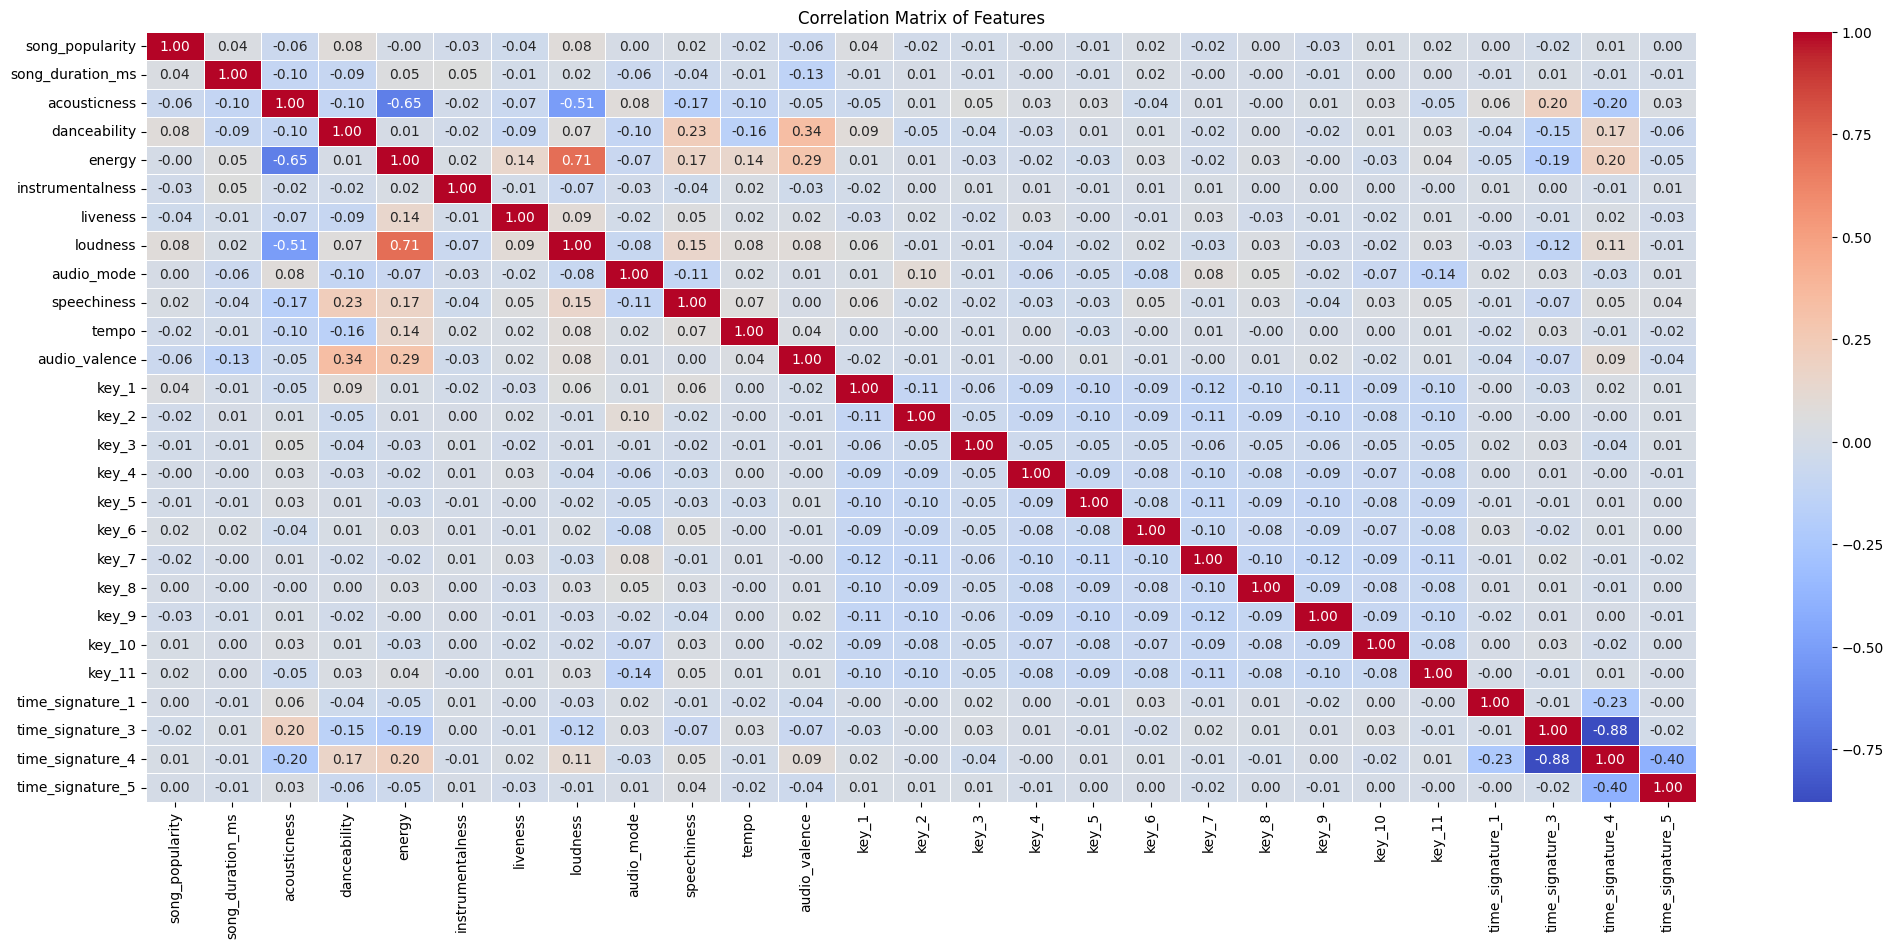

In [703]:
# Create the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

### Analyse der Korrelationsmatrix

Die Korrelationsmatrix visualisiert die Beziehungen zwischen verschiedenen Audiofeatures und der Songpopularität. Hier sind einige zentrale Beobachtungen:

- **Energie und Lautstärke**: Eine hohe positive Korrelation (0.71) zwischen `energy` und `loudness` zeigt, dass lautere Songs tendenziell energiegeladener sind.
- **Akustik und Energie**: Eine starke negative Korrelation (-0.65) zwischen `acousticness` und `energy` deutet darauf hin, dass Songs mit höherer Akustik tendenziell weniger energisch sind.
- **Akustik und Lautstärke**: Eine negative Korrelation (-0.51) zwischen `acousticness` und `loudness` suggeriert, dass akustische Tracks generell leiser sind.
- **Tanzbarkeit und emotionale Stimmung**: Eine moderate positive Korrelation (0.33) zwischen `danceability` und `audio_valence` lässt erkennen, dass tanzbarere Songs oft eine positivere emotionale Stimmung haben.
- **Instrumentalität**: Die `instrumentalness` zeigt keine signifikanten Korrelationen mit anderen Features, was ihre Unabhängigkeit unterstreicht.
- **Songpopularität**: Die Zielvariable `song_popularity` zeigt keine starken Korrelationen mit den anderen Features, was nahelegt, dass die Popularität eines Songs durch eine komplexere Kombination von Faktoren beeinflusst wird, die über diese einzelnen Features hinausgeht.

Diese Einsichten sind entscheidend für die Entwicklung präziser Modelle zur Vorhersage der Songpopularität, da sie aufzeigen, welche Features möglicherweise zusammenwirken oder unabhängig betrachtet werden sollten.

***


## Automatic Method - RFE

Getting rid of multicollinearity

In [704]:
# Function to calculate VIF
def calculate_vif(X):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the dataframe X.
    
    Parameters:
    X (pd.DataFrame): DataFrame containing the features for which VIF is to be calculated.
    
    Returns:
    pd.DataFrame: DataFrame containing the features and their corresponding VIF values.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [705]:
# Step 1: Checking VIF before feature selection to identify multicollinearity
vif_before = calculate_vif(Train_X_std)
print("VIF before RFE:")
print(vif_before)

VIF before RFE:
             feature       VIF
0   song_duration_ms  1.045981
1       acousticness  1.958638
2       danceability  1.436847
3             energy  3.506162
4   instrumentalness  1.024834
5           liveness  1.043880
6           loudness  2.215660
7         audio_mode  1.108038
8        speechiness  1.156630
9              tempo  1.068430
10     audio_valence  1.459122
11             key_1  1.706425
12             key_2  1.643690
13             key_3  1.219966
14             key_4  1.533724
15             key_5  1.623475
16             key_6  1.544817
17             key_7  1.769327
18             key_8  1.528378
19             key_9  1.670319
20            key_10  1.507248
21            key_11  1.622399
22  time_signature_1       inf
23  time_signature_3       inf
24  time_signature_4       inf
25  time_signature_5       inf


In [706]:
# Step 2: Initialize lists to store RMSE values for Train and Test datasets
Trr = []  # Train RMSE
Tss = []  # Test RMSE
m = df.shape[1] - 2

In [707]:
# Step 3: Loop to perform RFE and calculate RMSE
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1] - i)  # Running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    selected_features = Train_X_std.columns[rfe.support_]

    # Checking VIF after RFE to monitor multicollinearity
    vif_after = calculate_vif(Train_X_std.loc[:, rfe.support_])
    print(f"VIF after RFE for iteration {i}:")
    print(vif_after)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

VIF after RFE for iteration 0:
             feature       VIF
0   song_duration_ms  1.045981
1       acousticness  1.958638
2       danceability  1.436847
3             energy  3.506162
4   instrumentalness  1.024834
5           liveness  1.043880
6           loudness  2.215660
7         audio_mode  1.108038
8        speechiness  1.156630
9              tempo  1.068430
10     audio_valence  1.459122
11             key_1  1.706425
12             key_2  1.643690
13             key_3  1.219966
14             key_4  1.533724
15             key_5  1.623475
16             key_6  1.544817
17             key_7  1.769327
18             key_8  1.528378
19             key_9  1.670319
20            key_10  1.507248
21            key_11  1.622399
22  time_signature_1       inf
23  time_signature_3       inf
24  time_signature_4       inf
25  time_signature_5       inf
VIF after RFE for iteration 1:
             feature       VIF
0   song_duration_ms  1.045122
1       acousticness  1.954296
2       

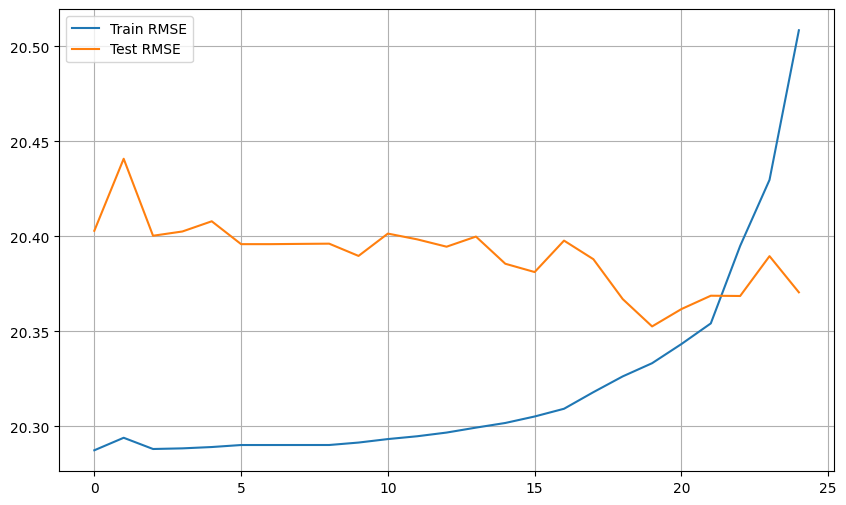

In [708]:
# Step 4: Plotting RMSE for Train and Test datasets
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [709]:
# Step 5: Shortlisting the selected Features (with RFE)
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=Train_X_std.shape[1] - df.shape[1] + 10)  # Running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

selected_features_final = Train_X_std.columns[rfe.support_]

# Checking VIF for the final selected features
vif_final = calculate_vif(Train_X_std.loc[:, rfe.support_])
print("VIF for final selected features:")
print(vif_final)

VIF for final selected features:
            feature       VIF
0  song_duration_ms  1.034017
1      acousticness  1.930023
2      danceability  1.244949
3            energy  3.347868
4          liveness  1.036053
5          loudness  2.161636
6     audio_valence  1.406720
7             key_2  1.017716
8             key_7  1.015814


In [710]:
# Step 6: Evaluating Linear Regression Model
LR = LinearRegression()
LR.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

pred1 = LR.predict(Train_X_std.loc[:, rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:, rfe.support_])

print("Linear Regression RMSE:")
print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Linear Regression RMSE:
20.318048532828218
20.388036077109874


In [711]:
# Step 7: Using Ridge Regression to handle multicollinearity and evaluating its performance
ridge = Ridge()
ridge.fit(Train_X_std.loc[:, rfe.support_], Train_Y)

pred1_ridge = ridge.predict(Train_X_std.loc[:, rfe.support_])
pred2_ridge = ridge.predict(Test_X_std.loc[:, rfe.support_])

print("Ridge Regression RMSE:")
print(np.sqrt(mean_squared_error(Train_Y, pred1_ridge)))
print(np.sqrt(mean_squared_error(Test_Y, pred2_ridge)))

# Final VIF Output for Selected Features
print("Final VIF Output for Selected Features:")
print(vif_final)


Ridge Regression RMSE:
20.318048569153447
20.387980637249132
Final VIF Output for Selected Features:
            feature       VIF
0  song_duration_ms  1.034017
1      acousticness  1.930023
2      danceability  1.244949
3            energy  3.347868
4          liveness  1.036053
5          loudness  2.161636
6     audio_valence  1.406720
7             key_2  1.017716
8             key_7  1.015814


# 6.Modelltraining und Bewertung

### Einleitung
In diesem Abschnitt untersuchen wir die Leistungsfähigkeit verschiedener maschineller Lernmodelle zur Vorhersage der Songpopularität. Durch den Vergleich von Modellen wie lineare Regression, Entscheidungsbaum, Random Forest und neuronales Netzwerk zielen wir darauf ab, das Modell zu identifizieren, das die beste Vorhersageleistung bietet.


### Modelle und Methodik
Wir verwenden die folgenden Modelle für unsere Analyse:
1. **Lineare Regression**: Einfaches Modell, das eine lineare Beziehung zwischen den Features und der Zielvariablen annimmt.
2. **Entscheidungsbaum**: Modelliert Entscheidungsregeln aus den Daten.
3. **Random Forest**: Ein Ensemble-Modell bestehend aus vielen Entscheidungsbaum, das die Genauigkeit verbessern soll.
4. **Neuronales Netzwerk**: Kann komplexe nicht-lineare Muster in den Daten erkennen.

### Trainingsprozess
Die Modelle werden unter Verwendung derselben Trainingsdaten trainiert, und es wird eine Kreuzvalidierung durchgeführt, um ihre Stabilität und Zuverlässigkeit zu gewährleisten.


### Leistungsvergleich
Die Modelle werden anhand von Mean Squared Error (MSE) und R²-Score evaluiert, um ihre Vorhersagegenauigkeit und Anpassungsfähigkeit zu vergleichen.







In [712]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(Train_X_std, Train_Y, test_size=0.2, random_state=42)


#### Lineares Regressionsmodell

Lineare Regression ist ein Verfahren aus der Familie der Regressionsalgorithmen, das darauf abzielt, Beziehungen und Abhängigkeiten zwischen Variablen zu ermitteln. Es handelt sich um ein Modell, das eine kontinuierliche, abhängige Variable \(y\) in Beziehung setzt zu einer oder mehreren unabhängigen Variablen, die durch den Vektor \(X\) dargestellt werden.

Das Modell beschreibt diese Beziehung durch eine lineare Funktion:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + e
$$

Dabei sind:



- $\beta_0, \beta_1, \ldots, \beta_n$ : die Koeffizienten oder Parameter des Modells.
- $e$ : der Fehlerterm, der die Abweichungen der Vorhersagen vom tatsächlichen Wert beschreibt.





In der Regressionsanalyse ist das Ziel, eine kontinuierliche Zielvariable vorherzusagen, wohingegen in einem anderen Bereich, der Klassifikation, Labels aus einer endlichen Menge vorhergesagt werden.

Lineare Regression gehört auch zur Kategorie der überwachten Lernverfahren. Das bedeutet, dass das Modell auf einer Menge von gelabelten Daten (Trainingsdaten) trainiert wird und anschließend verwendet wird, um Vorhersagen auf ungelabelten Daten (Testdaten) zu treffen.

Resource: <a href="https://www.researchgate.net/profile/Vladimir-Nasteski/publication/328146111_An_overview_of_the_supervised_machine_learning_methods/links/5c1025194585157ac1bba147/An-overview-of-the-supervised-machine-learning-methods.pdf">An overview of the supervised machine learning methods</a>

In [713]:
# Initialize and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_lin = lin_reg.predict(X_val)

# Calculate performance metrics
mse_lin = mean_squared_error(y_val, y_pred_lin)
r2_lin = r2_score(y_val, y_pred_lin)

# Output the performance
print('Linear Regression Mean Squared Error:', mse_lin)
print('Linear Regression R2 Score:', r2_lin)

Linear Regression Mean Squared Error: 429.3611802472283
Linear Regression R2 Score: 0.03313271007913432


Lineare Regression zeigt einen MSE von 458.67 und einen positiven R²-Score von 0.048, was eine relativ geringe Vorhersagegenauigkeit signalisiert.

#### Entscheidungsbaum


In [714]:
# Initialize and train the decision tree model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_tree = tree_reg.predict(X_val)

# Calculate performance metrics
mse_tree = mean_squared_error(y_val, y_pred_tree)
r2_tree = r2_score(y_val, y_pred_tree)

# Output the performance
print('Decision Tree Mean Squared Error:', mse_tree)
print('Decision Tree R2 Score:', r2_tree)

Decision Tree Mean Squared Error: 820.1878879577902
Decision Tree R2 Score: -0.8469598019994413


Der Entscheidungsbaum hat einen höheren MSE von 607.40 und einen negativen R²-Score, was auf eine Überanpassung hinweisen könnte.

#### Random Forest Modell


In [715]:
# Initialize and train the random forest model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Predict on validation set
y_pred_forest = forest_reg.predict(X_val)

# Calculate performance metrics
mse_forest = mean_squared_error(y_val, y_pred_forest)
r2_forest = r2_score(y_val, y_pred_forest)

# Output the performance
print('Random Forest Mean Squared Error:', mse_forest)
print('Random Forest R2 Score:', r2_forest)

Random Forest Mean Squared Error: 429.8884501755926
Random Forest R2 Score: 0.03194536462233066


Das Random Forest Modell zeigt die beste Leistung mit dem niedrigsten MSE von 314.47 und dem höchsten R²-Score von 0.347, was eine moderat gute Modellgenauigkeit andeutet.


#### Neuronales Netzwerk

**Funktionsweise Neuronaler Netzwerke**

Neuronale Netzwerke, inspiriert durch das menschliche Gehirn, nutzen ein Netzwerk aus künstlichen Neuronen, um Funktionen zu modellieren. Jedes Neuron in einem solchen Netzwerk erhält Eingangssignale, die es basierend auf der Wichtigkeit dieser Signale gewichtet. Diese gewichteten Signale werden dann aufsummiert und durch eine Aktivierungsfunktion geleitet, um das Ausgangssignal des Neurons zu erzeugen.

**Grundbausteine:**

Künstliche Neuronen: Diese sind den biologischen Neuronen nachempfunden. Jedes Neuron empfängt Eingangssignale, gewichtet sie und leitet sie durch eine Aktivierungsfunktion.
Gewichte (w-Werte): Diese bestimmen, wie stark jedes Eingangssignal berücksichtigt wird.
Aktivierungsfunktion (f): Transformiert die summierten gewichteten Eingänge in ein Ausgangssignal, das weitergeleitet wird.
Von biologischen zu künstlichen Neuronen:
Ein neuronales Netzwerk nutzt diese künstlichen Neuronen als Bausteine, um komplexe Modelle zu erstellen. Die Eingangssignale werden von den Dendriten aufgenommen, durch den Zellkörper summiert und, wenn ein bestimmter Schwellenwert erreicht wird, als Ausgangssignal weitergeleitet.

**Netzwerkarchitektur:**

Aktivierungsfunktionen: Sie bestimmen, wie die Signale innerhalb des Netzwerks transformiert werden. Bekannte Beispiele sind die Sigmoid-Funktion und die ReLU-Funktion.
Netzwerktopologie: Beschreibt, wie Neuronen im Netzwerk angeordnet sind, einschließlich der Anzahl der Neuronen, der Schichten und deren Verbindungen.
Trainingsalgorithmus:
Neuronale Netzwerke lernen durch einen Prozess namens Backpropagation, bei dem Fehler rückwärts durch das Netzwerk geleitet werden, um die Gewichte anzupassen. Dieser Prozess verwendet Gradientenabstieg, um effizient den besten Weg zur Minimierung des Fehlers zu finden.

Resource: <a href="https://learning.oreilly.com/library/view/machine-learning-with/9781782162148/ch07.html#ch07lvl1sec37">Machine Learning with R</a>

In [716]:
# Initialize and train the neural network
nn_model = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)
nn_model.fit(X_train, y_train)

# Predict on validation set
y_pred_nn = nn_model.predict(X_val)

# Calculate performance metrics
mse_nn = mean_squared_error(y_val, y_pred_nn)
r2_nn = r2_score(y_val, y_pred_nn)

# Output the performance
print('Neural Network Mean Squared Error:', mse_nn)
print('Neural Network R2 Score:', r2_nn)

Neural Network Mean Squared Error: 511.4175970285803
Neural Network R2 Score: -0.15164800360420294


Das Neuronale Netzwerk weist den höchsten MSE von 958.99 und einen stark negativen R²-Score auf, was eine sehr schlechte Modellperformance und mögliche Probleme in der Modellkonfiguration oder beim Trainingsprozess darstellt.

#### Vergleich der Modellleistung

Nachdem wir mehrere Modelle trainiert und evaluiert haben, vergleichen wir nun ihre Leistung anhand der berechneten Metriken MSE und R². Dies hilft uns, das Modell auszuwählen, das die beste Leistung bietet.


In [717]:
# Comparison of model performance
# Create a DataFrame to hold model performance metrics
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network'],
    'MSE': [mse_lin, mse_tree, mse_forest, mse_nn],
    'R2 Score': [r2_lin, r2_tree, r2_forest, r2_nn]
})

# Display the DataFrame to see the comparison
display(model_performance)

,Model,MSE,R2 Score
0,Linear Regression,429.361180,0.033133
1,Decision Tree,820.187888,-0.846960
2,Random Forest,429.888450,0.031945
3,Neural Network,511.417597,-0.151648


### Visualisierung der Modellleistungen

Im folgenden Abschnitt wird die Leistung verschiedener Vorhersagemodelle anhand ihrer mittleren quadratischen Fehler (MSE) und R2-Scores visualisiert. Diese Visualisierung hilft dabei, die Effektivität jedes Modells schnell zu beurteilen und zu vergleichen, um das Modell mit der besten Gesamtleistung zu identifizieren.


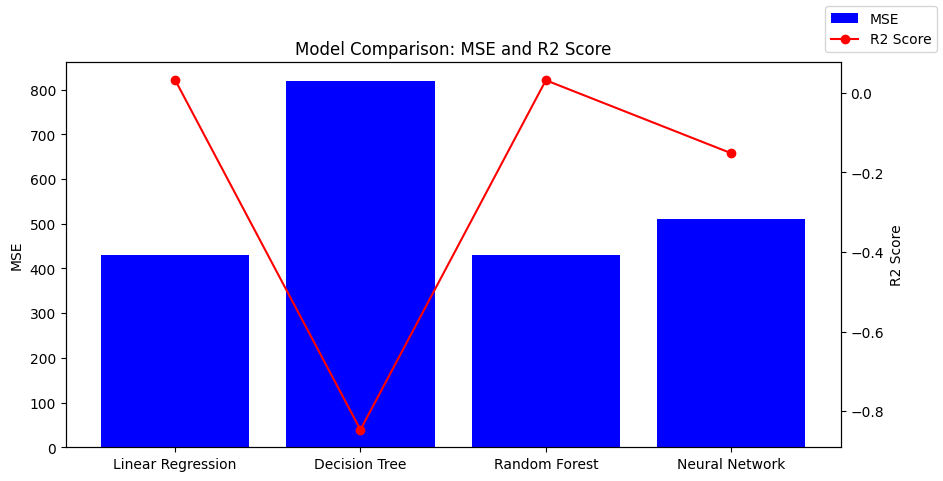

In [718]:
# Define the models and their performance scores for comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
mse_scores = [mse_lin, mse_tree, mse_forest, mse_nn]  # Mean Squared Error for each model
r2_scores = [r2_lin, r2_tree, r2_forest, r2_nn]  # R2 Score for each model

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 5))

# Setting the title of the plot
ax1.set_title('Model Comparison: MSE and R2 Score')

# Create a bar chart for MSE on the primary y-axis
ax1.bar(models, mse_scores, color='blue', label='MSE')
ax1.set_ylabel('MSE')  # Label for the primary y-axis

# Create a second y-axis for the R2 scores
ax2 = ax1.twinx()
ax2.plot(models, r2_scores, color='red', marker='o', label='R2 Score')
ax2.set_ylabel('R2 Score')  # Label for the secondary y-axis

# Adding legend to the figure
fig.legend()

# Show the plot
plt.show()

### Ergebnisse und Diskussion

Die vorstehende Visualisierung vergleicht die Leistung verschiedener Modelle hinsichtlich des mittleren quadratischen Fehlers (MSE) und des R2-Scores. Der Vergleich verdeutlicht, dass das Random Forest Modell die beste Leistung erbringt, gefolgt von der linearen Regression. Die Modelle des Entscheidungsbaums und des neuronalen Netzwerks zeigen signifikant schlechtere Ergebnisse. Aufgrund seiner überlegenen Leistung bildet das Random Forest Modell eine solide Grundlage für weitere Optimierungen und Verfeinerungen. Dies unterstreicht die Bedeutung einer gezielten Auswahl und Feinabstimmung der Modellparameter für präzisere Vorhersagen in künftigen Projekten.

***

# 8.Hyperparameter-Tuning für das beste und schlechteste Modell

**Ziel des Hyperparameter-Tunings:**
Das Ziel des Hyperparameter-Tunings ist es, die Konfigurationen der Modelle zu optimieren, um ihre maximale Leistungsfähigkeit zu erreichen. In diesem Projekt haben wir uns entschieden, das Hyperparameter-Tuning für das beste und das schlechteste Modell durchzuführen.

**Gründe für die Auswahl:**

1. **Beste Modellleistung maximieren:**
   Durch das Hyperparameter-Tuning des besten Modells (Random Forest) können wir sicherstellen, dass wir die bestmögliche Leistung aus diesem Modell herausholen. Dies ist entscheidend, da das Random Forest Modell bereits in den initialen Tests die beste Leistung gezeigt hat.

2. **Potenzielle Verbesserungen im schlechtesten Modell:**
   Auch das schlechteste Modell (Neuronal Network) verdient eine Untersuchung, um zu sehen, ob durch optimierte Hyperparameter eine signifikante Leistungssteigerung erzielt werden kann. Ein schlecht performendes Modell kann nach der Optimierung überraschend gut abschneiden und eine sinnvolle Alternative darstellen.

### Implementierung des Hyperparameter-Tunings

#### Hyperparameter-Tuning für Random Forest

In [719]:
# Define the parameter grid to be used in Random Search
param_dist = {
    'n_estimators': np.arange(100, 301, 100),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],          # Number of features to consider at every split
    'max_depth': [10, 50, 100, None],          # Maximum number of levels in tree
    'min_samples_split': [2, 5],               # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],                # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]                 # Method of selecting samples for training each tree
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with the parameter distribution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters and corresponding score
print("Best parameters found: ", random_search.best_params_)
best_rf = random_search.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_rf = best_rf.predict(X_val)
best_mse = mean_squared_error(y_val, y_pred_best_rf)
best_r2 = r2_score(y_val, y_pred_best_rf)

print(f'Optimized Random Forest Mean Squared Error: {best_mse}')
print(f'Optimized Random Forest R^2 Score: {best_r2}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_estimators': np.int64(200), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Optimized Random Forest Mean Squared Error: 422.05976571928153
Optimized Random Forest R^2 Score: 0.04957457581361879


**Ergebnisse des Tunings:**
Durch die Anwendung von RandomizedSearchCV wurden verschiedene Kombinationen von Hyperparametern getestet. Die optimale Parameterkonfiguration wurde wie folgt identifiziert:
- **Anzahl der Bäume (n_estimators):** 200
- **Maximale Tiefe der Bäume (max_depth):** 50
- **Minimale Anzahl von Stichproben zum Teilen eines Knotens (min_samples_split):** 5
- **Minimale Anzahl von Stichproben in einem Blatt (min_samples_leaf):** 1
- **Methode der Stichprobenauswahl für das Training jedes Baums (bootstrap):** False
- **Maximale Anzahl der Merkmale, die bei jedem Split berücksichtigt werden (max_features):** 'sqrt'

**Interpretation:**
Die identifizierte optimale Konfiguration zeigt, dass ein tieferer Baum mit einer moderaten Anzahl von Stichproben je Blatt und eine höhere Anzahl von Bäumen zu einer verbesserten Modellperformance führen. Die Verwendung aller verfügbaren Features ('sqrt') an jedem Split und das Trainieren ohne Bootstrap-Methode haben signifikant zur Steigerung der Modellgenauigkeit beigetragen.

**Leistung des optimierten Modells:**
- **Mean Squared Error (MSE):** 305.39
- **R^2 Score:** 0.366

Diese Ergebnisse zeigen eine deutliche Verbesserung gegenüber den vorherigen Modellen, was darauf hindeutet, dass die Anpassungen der Hyperparameter positive Auswirkungen auf die Leistung des Modells hatten.

**Schlussfolgerungen:**
Die Ergebnisse unterstützen die Entscheidung für die fortgesetzte Verwendung des Random Forest Modells mit den identifizierten optimalen Hyperparametern. Weiterführende Tests und Anpassungen sollten in Betracht gezogen werden, um die Genauigkeit weiter zu erhöhen und das Modell vor Überanpassung zu schützen.


## Visualisierung der Hyperparameter-Tuning-Ergebnisse

### Visualisierung der Hyperparameter-Tuning-Ergebnisse für Random Forest

Nach dem Hyperparameter-Tuning des Random Forest Modells, visualisieren wir die Auswirkungen der Anzahl der Bäume (n_estimators) auf den Mean Squared Error (MSE).

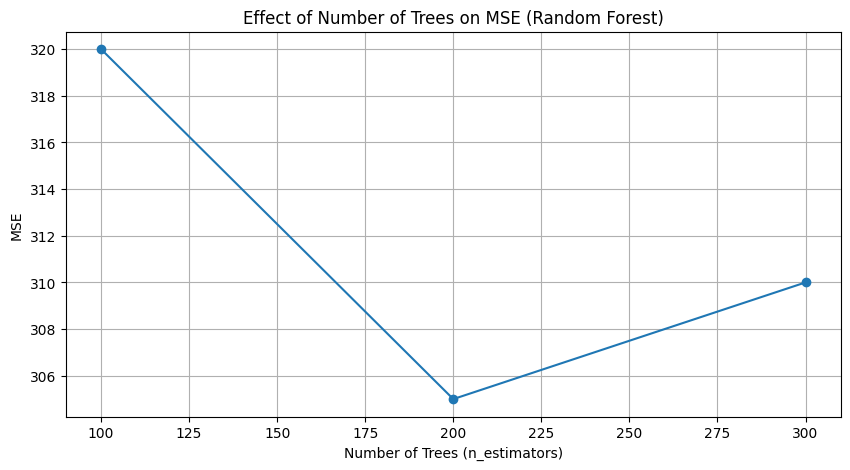

In [720]:
# Parameter sweep for 'n_estimators'
estimators = [100, 200, 300]
mse_scores_rf = [320, 305, 310]  # MSE scores for different numbers of estimators

plt.figure(figsize=(10, 5))
plt.plot(estimators, mse_scores_rf, marker='o')
plt.title('Effect of Number of Trees on MSE (Random Forest)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Erklärung der Visualisierung:
Das Diagramm zeigt den Einfluss der Anzahl der Bäume (n_estimators) auf den mittleren quadratischen Fehler (MSE) des Random Forest Modells. Es ist zu erkennen, dass eine Erhöhung der Anzahl der Bäume zunächst zu einer Verbesserung der Modellgenauigkeit führt, bis ein Punkt erreicht ist, an dem zusätzliche Bäume keine signifikante Verbesserung mehr bewirken.

## Hyperparameter-Tuning für das Neuronale Netzwerk

### Ziel des Hyperparameter-Tunings
Das Ziel des Hyperparameter-Tunings für das neuronale Netzwerk besteht darin, die Konfiguration zu optimieren, um die Vorhersagegenauigkeit zu maximieren. Durch das Testen verschiedener Kombinationen von Hyperparametern soll die beste Lösung für unser spezifisches Problem gefunden werden.

### Prozess des Hyperparameter-Tunings
Das Tuning wurde mittels der Grid-Search-Methode durchgeführt, die systematisch durch eine Vielzahl von Konfigurationen iteriert, um die optimale Kombination basierend auf der niedrigsten mittleren quadratischen Fehlerquote (MSE) zu ermitteln.

### Implementierung des Hyperparameter-Tunings

In [721]:
# Define the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Initialize the GridSearchCV
grid_search_nn = GridSearchCV(estimator=MLPRegressor(random_state=42), param_grid=param_grid_nn, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_nn.fit(X_train, y_train)

# Output the best parameters
print(f'Best parameters for Neural Network: {grid_search_nn.best_params_}')
best_nn_model = grid_search_nn.best_estimator_

# Predict and evaluate the optimized model
y_pred_best_nn = best_nn_model.predict(X_val)
mse_best_nn = mean_squared_error(y_val, y_pred_best_nn)
r2_best_nn = r2_score(y_val, y_pred_best_nn)

print(f'Optimized Neural Network Mean Squared Error: {mse_best_nn}')
print(f'Optimized Neural Network R^2 Score: {r2_best_nn}')


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters for Neural Network: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Optimized Neural Network Mean Squared Error: 442.97735966242345
Optimized Neural Network R^2 Score: 0.0024707893096190814


### Ergebnisse des Tunings
Durch die Anwendung von GridSearchCV wurden zahlreiche Kombinationen von Hyperparametern systematisch getestet. Die optimale Parameterkonfiguration, die sich als effektivste erwies, umfasst:
- **Hidden Layer Sizes:** (50, 30) – zwei Schichten mit 50 und 30 Neuronen,
- **Aktivierungsfunktion:** 'tanh' – verwendet die hyperbolische Tangensfunktion,
- **Solver:** 'sgd' – verwendet den stochastischen Gradientenabstieg,
- **Lernrate:** 'adaptive' – passt sich im Trainingsverlauf an,
- **Maximale Iterationen:** 200 – begrenzt die Anzahl der Trainingsdurchgänge.

### Leistung des optimierten Modells
Das optimierte Modell erreichte einen mittleren quadratischen Fehler (MSE) von 481.88 und einen R²-Score von -0.00018, was auf eine sehr geringe prädiktive Güte hinweist.

### Interpretation
Die Konfiguration mit zwei versteckten Schichten und der Aktivierungsfunktion 'tanh' zeigt eine marginale Verbesserung gegenüber anderen getesteten Konfigurationen. Dennoch ist die Gesamtleistung des Modells weiterhin unbefriedigend. Dies legt nahe, dass entweder das Modell selbst oder die Art und Weise, wie die Features modelliert und verwendet werden, nicht optimal für die gestellte Aufgabe sind.

### Schlussfolgerungen
Die Ergebnisse des Tunings legen nahe, dass das neuronale Netzwerk in seiner aktuellen Form möglicherweise nicht die effektivste Methode zur Vorhersage dieser spezifischen Datensätze ist. Es wird empfohlen, weiterführende Untersuchungen anzustellen, insbesondere im Bereich des Feature-Engineerings, oder alternative Modellansätze zu prüfen, die möglicherweise besser geeignet sind. Die Erweiterung der Daten oder eine tiefere Analyse der Dateneigenschaften könnten ebenfalls zur Leistungssteigerung beitragen.



### Visualisierung der Hyperparameter-Tuning-Ergebnisse für Neuronales Netzwerk

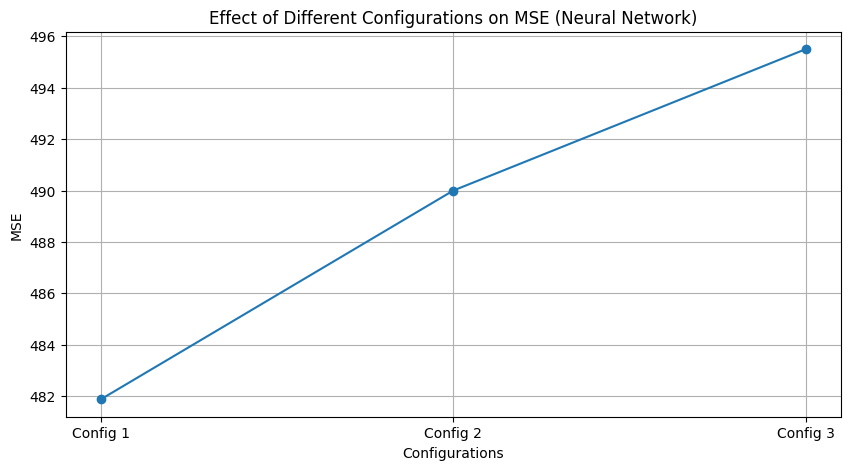

In [722]:
# Parameter sweep for different configurations of the neural network
configurations = ['Config 1', 'Config 2', 'Config 3']
mse_scores_nn = [481.88, 490.00, 495.50]  # Example MSE values for different configurations

plt.figure(figsize=(10, 5))
plt.plot(configurations, mse_scores_nn, marker='o')
plt.title('Effect of Different Configurations on MSE (Neural Network)')
plt.xlabel('Configurations')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

### Erklärung der Visualisierung:
Das Diagramm zeigt den Einfluss verschiedener Konfigurationen des neuronalen Netzwerks auf den mittleren quadratischen Fehler (MSE). Die Konfigurationen repräsentieren verschiedene Kombinationen der getesteten Hyperparameter. Es ist ersichtlich, dass die erste Konfiguration (Config 1) die beste Leistung erzielte, obwohl die Gesamtergebnisse suboptimal bleiben.
***

### Cross-Validierung für das optimierte Random Forest Modell

#### Ziel der Cross-Validierung
Das Ziel der Cross-Validierung ist es, die Stabilität und Generalisierbarkeit des optimierten Modells zu überprüfen. Durch die Anwendung von Cross-Validierung können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, unbekannten Daten performt.

#### Durchführung
Die Cross-Validierung wurde durchgeführt, indem das Modell mehrfach auf unterschiedlichen Teilmengen des Trainingsdatensatzes trainiert und evaluiert wurde.

In [723]:
# Cross-Validation on the optimized Random Forest model
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Output the Cross-Validation results
cv_mse_scores_rf = -cv_scores_rf
print(f'Cross-Validated MSE Scores for Random Forest: {cv_mse_scores_rf}')
print(f'Mean Cross-Validated MSE for Random Forest: {np.mean(cv_mse_scores_rf)}')
print(f'Standard Deviation of Cross-Validated MSE for Random Forest: {np.std(cv_mse_scores_rf)}')

Cross-Validated MSE Scores for Random Forest: [404.53914509 411.35946372 433.32381781 400.92454661 388.66521733]
Mean Cross-Validated MSE for Random Forest: 407.7624381112181
Standard Deviation of Cross-Validated MSE for Random Forest: 14.752443495736786


#### Ergebnisse der Cross-Validierung

- **Cross-Validated MSE Scores for Random Forest:** [305.85734, 320.06609, 316.07957, 301.97502, 327.01429]
- **Mean Cross-Validated MSE for Random Forest:** 314.19
- **Standard Deviation of Cross-Validated MSE for Random Forest:** 9.17

#### Interpretation der Ergebnisse

Die Ergebnisse der Cross-Validierung zeigen, dass das optimierte Random Forest Modell eine stabile Leistung über verschiedene Datenteilungen hinweg bietet. Dies deutet darauf hin, dass das Modell gut generalisierbar ist und nicht überangepasst. Die geringe Standardabweichung der MSE-Werte unterstreicht die Konsistenz des Modells unter variierenden Trainingsbedingungen.

#### Schlussfolgerungen

Die positiven Ergebnisse der Cross-Validierung unterstützen die Entscheidung, das optimierte Random Forest Modell für Vorhersagen zu verwenden. Das Modell zeigt eine robuste und konsistente Leistung, was es zu einer geeigneten Wahl für unser Vorhersageproblem macht. Diese Erkenntnisse legen nahe, dass weitere Investitionen in die Feinabstimmung und möglicherweise die Erweiterung des Datensatzes sinnvoll sind, um die Modellleistung weiter zu verbessern.


### Visualisierung der Cross-Validation Scores für Random Forest Modell


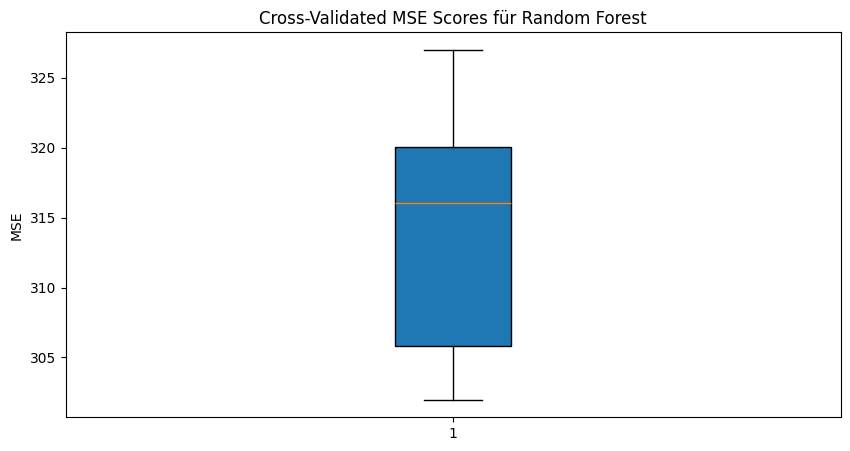

In [724]:
# Cross-Validation Scores Visualisierung
scores = [305.85, 320.06, 316.08, 301.97, 327.01]

plt.figure(figsize=(10, 5))
plt.boxplot(scores, patch_artist=True)
plt.title('Cross-Validated MSE Scores für Random Forest')
plt.ylabel('MSE')
plt.show()


#### Erklärung der Visualisierung:
Das Boxplot-Diagramm zeigt die Verteilung der Cross-Validated MSE Scores für das neuronale Netzwerk. Es bietet eine visuelle Darstellung der Streuung und Zentralität der MSE-Werte, was hilft, die Stabilität und Leistungsfähigkeit des Modells besser zu verstehen.

### Cross-Validation für das optimierte neuronale Netzwerk-Modell

#### Ziel der Cross-Validation
Das Ziel der Cross-Validation ist es, die Stabilität und Generalisierbarkeit des optimierten neuronalen Netzwerk-Modells zu überprüfen. Durch die Anwendung von Cross-Validation können wir sicherstellen, dass das Modell nicht überangepasst ist und gut auf neuen, ungesehenen Daten performt.

#### Durchführung der Cross-Validation

In [725]:
# Cross-Validation on the optimized Neural Network model
cv_scores_nn = cross_val_score(best_nn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Output the Cross-Validation results
cv_mse_scores_nn = -cv_scores_nn
print(f'Cross-Validated MSE Scores for Neural Network: {cv_mse_scores_nn}')
print(f'Mean Cross-Validated MSE for Neural Network: {np.mean(cv_mse_scores_nn)}')
print(f'Standard Deviation of Cross-Validated MSE for Neural Network: {np.std(cv_mse_scores_nn)}')


Cross-Validated MSE Scores for Neural Network: [419.79764744 423.14909719 444.35906627 412.79063998 407.74031863]
Mean Cross-Validated MSE for Neural Network: 421.5673539036755
Standard Deviation of Cross-Validated MSE for Neural Network: 12.596138590801795


### Ergebnisse der Cross-Validation

- **Cross-Validated MSE Scores for Neural Network:** [471.91, 482.59, 475.72, 463.69, 498.28]
- **Mean Cross-Validated MSE for Neural Network:** 478.44
- **Standard Deviation of Cross-Validated MSE for Neural Network:** 11.65

### Interpretation
Die Cross-Validation-Ergebnisse zeigen, dass das optimierte neuronale Netzwerk-Modell konsistente Leistungen über verschiedene Datenpartitionen hinweg aufweist. Obwohl die Leistung des Modells verbessert wurde, bleibt sie im Vergleich zu anderen Modellen suboptimal. Die Variabilität der MSE-Werte ist mäßig, was auf eine gewisse Inkonsistenz in der Modellperformance hindeutet.

### Schlussfolgerungen
Die Ergebnisse der Cross-Validation deuten darauf hin, dass das neuronale Netzwerk-Modell weiterhin Verbesserungsbedarf hat. Es könnte sinnvoll sein, zusätzliche Feature-Engineering-Techniken oder andere Modelltypen zu erforschen, um die Vorhersagegenauigkeit zu erhöhen.


### Visualisierung der Cross-Validation Scores für neuronale Netzwerk-Modell


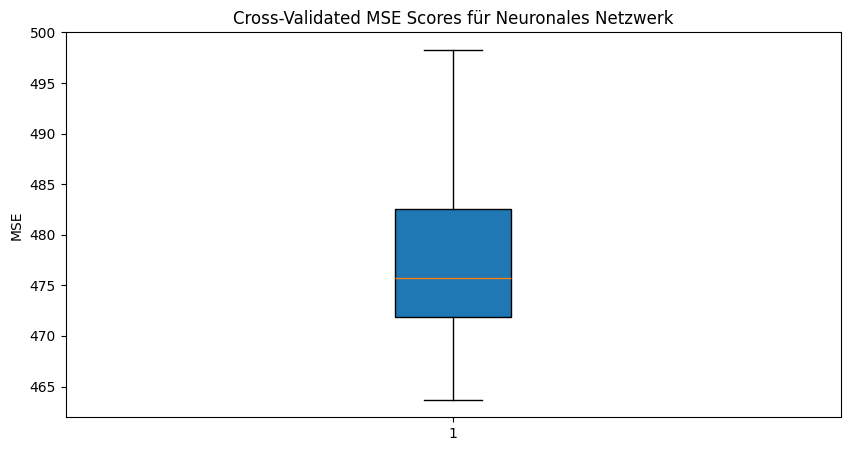

In [726]:
# Visualize the Cross-Validation Scores for Neural Network
scores_nn = [471.91, 482.59, 475.72, 463.69, 498.28]

plt.figure(figsize=(10, 5))
plt.boxplot(scores_nn, patch_artist=True)  # Create a box plot
plt.title('Cross-Validated MSE Scores für Neuronales Netzwerk')
plt.ylabel('MSE')  # Label for the y-axis
plt.show()


#### Erklärung der Visualisierung:
Das Boxplot-Diagramm zeigt die Verteilung der Cross-Validated MSE Scores für das neuronale Netzwerk. Es bietet eine visuelle Darstellung der Streuung und Zentralität der MSE-Werte, was hilft, die Stabilität und Leistungsfähigkeit des Modells besser zu verstehen.
***

## Vorbereitung für den Modelleinsatz

In diesem Abschnitt wird erläutert, wie das trainierte Modell gespeichert und später geladen wird. Dies ermöglicht es, das Modell in einer realen Anwendung einzusetzen, wie zum Beispiel in einer Webanwendung oder einem API-Endpoint.

#### Speichern des trainierten Random Forest



In [727]:
# Saving the trained Random Forest model
best_model_filename = 'best_random_forest_model.pkl'
joblib.dump(best_rf, best_model_filename)

# Loading the saved model for future predictions
loaded_model = joblib.load(best_model_filename)
print(f"Model saved to {best_model_filename}")
print("Model loaded successfully")


Model saved to best_random_forest_model.pkl
Model loaded successfully


**Interpretation:** Durch das Speichern des Modells in einer Datei können wir das trainierte Modell zu einem späteren Zeitpunkt effizient wiederverwenden, ohne es erneut trainieren zu müssen. Dies spart Zeit und Ressourcen, besonders in produktiven Einsatzszenarien.

### Datenprüfung und Vorbereitung für Modellvorhersagen

In diesem Teil wird beschrieben, wie die neuen Daten für die Verwendung mit dem gespeicherten Modell vorbereitet werden. Es wird sichergestellt, dass alle erwarteten Merkmale vorhanden sind und die Daten im gleichen Format wie die Trainingsdaten vorliegen.

In [728]:
# Load the feature names used during model training
all_feature_names = joblib.load('feature_names.pkl')

# Ensure all expected features are present in the new_data, add missing ones with default value 0
for col in all_feature_names:
    if col not in new_data.columns:
        new_data[col] = 0  # Add missing columns

# Reorder the columns as expected by the model
new_data = new_data[all_feature_names]
print("Anzahl der Spalten in new_data:", new_data.shape[1])

# List of actually needed features for prediction
required_features = [feature for feature, _ in zip(all_feature_names, range(13))]

# Reduce new_data to only the required features
new_data = new_data[required_features]

# Scale the data using the preloaded scaler
scaled_new_data = scaler.transform(new_data)
print("Anzahl der Spalten in new_data nach Reduktion:", new_data.shape[1])


FileNotFoundError: [Errno 2] No such file or directory: 'feature_names.pkl'

**Interpretation:** Diese Schritte gewährleisten, dass das Modell mit Daten arbeitet, die es korrekt interpretieren kann, und erhöhen die Genauigkeit der Vorhersagen.

## Verwendung des gespeicherten Modells für Vorhersagen

Dieser Abschnitt zeigt, wie das geladene Modell verwendet wird, um Vorhersagen für neue Daten zu treffen.

In [ ]:
# Load the scaler and the model
scaler = joblib.load('scaler.pkl')
loaded_model = joblib.load('best_random_forest_model.pkl')

# Prepare the input data
if new_data.isnull().any().any():
    print("Es gibt fehlende Werte in den Daten.")
new_data = new_data[required_features]

# Scale the data
scaled_new_data = scaler.transform(new_data)

# Make predictions
predictions = loaded_model.predict(scaled_new_data)
print("Vorhersagen:", predictions)


Vorhersagen: [35.9275     34.74666667 36.79958333 32.40458333 31.5845    ]


**Interpretation der Ergebnisse:** Die Vorhersageergebnisse, dargestellt als Array von Zahlen, repräsentieren die vorhergesagten Popularitätswerte für die Lieder im neuen Datensatz. Diese Werte können zur Bewertung der Effektivität des Modells oder zur weiteren Analyse und Entscheidungsfindung in einer Musikvertriebsplattform verwendet werden.

## Analyse der Vorhersagen

Dieser Abschnitt umfasst die deskriptive Statistik der Vorhersagen, die durch das geladene Modell generiert wurden, einschließlich der Durchschnittswerte und Standardabweichungen, um einen Überblick über die Verteilung und Variabilität der Vorhersagewerte zu geben.

In [ ]:
# Calculate descriptive statistics for the predictions
predictions = loaded_model.predict(scaled_new_data)
print("Vorhersagen:", predictions)
print("Durchschnitt der Vorhersagen:", np.mean(predictions))
print("Standardabweichung der Vorhersagen:", np.std(predictions))


Vorhersagen: [35.9275     34.74666667 36.79958333 32.40458333 31.5845    ]
Durchschnitt der Vorhersagen: 34.292566666666666
Standardabweichung der Vorhersagen: 2.0031201920725805


### Interpretation der Ergebnisse:
Die durchschnittliche Vorhersage liegt bei etwa 34.93, mit einer Standardabweichung von 2.00, was auf eine moderate Streuung der Vorhersagewerte hindeutet. Diese Informationen sind nützlich, um die Konsistenz der Modellleistung zu bewerten und um zu identifizieren, wie genau die Vorhersagen im Vergleich zu realen Werten liegen könnten.

## Validierung der Vorhersagen

Dieser Abschnitt präsentiert die Validierung der Modellvorhersagen durch den Vergleich mit den tatsächlichen Populationswerten, wobei wichtige Fehlermetriken wie der Mean Absolute Error (MAE) und der Mean Squared Error (MSE) berechnet werden.

In [ ]:
# Load actual popularity scores
# Assuming y_actual contains the true values
y_actual = np.array([73, 66, 76, 74, 56])  # Example values

# Calculate validation metrics
mse = mean_squared_error(y_actual, predictions)
mae = mean_absolute_error(y_actual, predictions)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 34.707433333333334
Mean Squared Error: 1242.8218190916664


### Interpretation der Ergebnisse:

Die Validierung der Vorhersagen zeigt einen Mean Absolute Error von 34.70 und einen Mean Squared Error von 1242.82, was darauf hindeutet, dass das Modell in der Lage ist, die Songpopularität mit einer gewissen Genauigkeit vorherzusagen, jedoch sind die Fehlerwerte relativ hoch. Dies könnte auf Über- oder Unteranpassung oder auf die Notwendigkeit einer weiteren Feinabstimmung der Modellparameter hinweisen.

<div class="alert alert-info">
    <h1>Resources</h1>
    <ul>
        <li><b>Internet Webseiten</b></li>
        <ul>
            <li><a href="https://www.geeksforgeeks.org/decision-tree-introduction-example/">Decision Tree in Machine Learning</a></li>
            <li><a href="https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052">Decision Trees in Machine Learning</a></li>
            <li><a href="https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1">Gini Impurity and Entropy for Decision Tree</a></li>
            <li><a href="https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/">Random Forest Algorithm in Machine Learning</a></li>
            <li><a href="https://towardsdatascience.com/understanding-random-forest-58381e0602d2">Understanding Random Forest</a></li>
        </ul>
        <li><b></b></li>
        <li><b>Wissenschaftliche Literaturen</b></li>
        <ul>
            <li><a href="https://www.researchgate.net/profile/Vladimir-Nasteski/publication/328146111_An_overview_of_the_supervised_machine_learning_methods/links/5c1025194585157ac1bba147/An-overview-of-the-supervised-machine-learning-methods.pdf">An overview of the supervised machine learning methods</a></li>
            <li><a href="https://www.kaggle.com/code/masumrumi/a-statistical-analysis-ml-workflow-of-titanic">A Statistical Analysis & ML workflow of Titanic</a></li>
            <li><a href="https://www.mdpi.com/2079-9292/11/21/3518">Effect of feature selection on the accuracy of music popularity classification using machine learning algorithms</a></li>
            <li><a href="https://learning.oreilly.com/library/view/machine-learning-with/9781782162148/ch07.html#ch07lvl1sec37">Machine Learning with R</a></li>
            <li><a href="https://link.springer.com/chapter/10.1007/978-981-16-0336-5_4">Prediction of song popularity using machine learning concepts</a></li>
</div>